## Import Necessary Libraries : 

In [354]:
import pickle
import gzip
import csv
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from PIL import Image
import os
import numpy as np
from matplotlib import pyplot as plt 
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import scipy.sparse

## MNIST Data Pre-Processing : 

In [369]:
def MnistData():
    filename = 'mnist.pkl.gz'
    f = gzip.open(filename, 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    return training_data, validation_data, test_data

## USPS Data Pre-Processing : 

In [370]:
USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)
USPS_data = np.asarray(USPSMat)
USPS_target = np.asarray(USPSTar)

In [371]:
X_USPS_Test, y_USPS_Test = USPS_data, USPS_target


In [372]:
training_data, validation_data, test_data = MnistData()
X_train = training_data[0]
y_train = training_data[1]
X_test = test_data[0]
y_test = test_data[1]

In [373]:
X_val = validation_data[0]
Y_val = validation_data[1]

## Neural Network : 

In [360]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential

num_classes=10
image_vector_size=28*28

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
Y_val = keras.utils.to_categorical(Y_val, num_classes)

image_size = 784 
model = Sequential()
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, epochs=30,verbose=False,validation_data=(X_val, Y_val))


## Accuracy & Loss For DNN : 

In [361]:
loss,accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Accuracy For MNIST-Training Data : ", accuracy*100)

print("Loss For MNIST-Training Data : ", loss*100)


Accuracy For MNIST-Training Data :  89.338
Loss For MNIST-Training Data :  40.61590757036209


In [362]:
loss,accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Accuracy For MNIST-Test Data : ", accuracy*100)

print("Loss For MNIST-Test Data : ", loss*100)

Accuracy For MNIST-Test Data :  89.79
Loss For MNIST-Test Data :  38.67188055753708


In [363]:
loss,accuracy = model.evaluate(X_val, Y_val, verbose=False)
print("Accuracy For MNIST-Validation Data : ", accuracy*100)

print("Loss For MNIST-Validation Data : ", loss*100)

Accuracy For MNIST-Validation Data :  90.25
Loss For MNIST-Validation Data :  37.42055241346359


In [364]:
Y_USPS_Test = keras.utils.to_categorical(y_USPS_Test, num_classes)

loss,accuracy = model.evaluate(X_USPS_Test, Y_USPS_Test, verbose=False)
print("Accuracy For USPS-Test Data : ", accuracy*100)

print("Loss For USPS-Test Data : ", loss*100)

Accuracy For USPS-Test Data :  35.946797339717975
Loss For USPS-Test Data :  223.53427700176437


## Prediction Variables for Confusion Matrix : 

In [365]:
Y_Train_P = model.predict(X_train, verbose = 0)
Y_Test_P = model.predict(X_test, verbose = 0)
Y_Val_P = model.predict(X_val, verbose = 0)
UPSPS_P1 = model.predict(X_USPS_Test, verbose = 0)

Y_Train_P= Y_Train_P.argmax(1)
Y_Test_P= Y_Test_P.argmax(1)
Y_val_pred = Y_Val_P.argmax(1)
UPSPS_P = UPSPS_P1.argmax(1)

## Save Data in .csv for Later Use : 

In [366]:
np.savetxt('NN_MNIST_Train.csv',Y_Train_P, delimiter=",")
np.savetxt('NN_MNIST_Test.csv',Y_Test_P, delimiter=",")
np.savetxt('NN_MNIST_Val.csv',Y_val_pred, delimiter=",")
np.savetxt('NN_USPS.csv',UPSPS_P, delimiter=",")

## SVM Package :

In [374]:
# SVM

classifier1 = SVC(kernel='rbf', C=2, gamma = 0.05, max_iter = 100);
classifier1.fit(X_train, y_train)
print (classifier1.score(X_train, y_train))


C:\Users\NEERAJ\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.9818


In [375]:
print (classifier1.score(X_test, y_test))

0.9656


## Confusion Matrix For Validation : 

Accuracy: 0.9652 for Validation
[[ 980    0    3    3    0    0    2    0    2    1]
 [   0 1057    1    0    0    0    2    2    2    0]
 [   2    1  976    5    1    0    0    2    3    0]
 [   0    0    6 1004    0   12    0    1    6    1]
 [   0    6    1    0  966    0    0    2    1    7]
 [   3    0    2   23    2  868    7    2    7    1]
 [   3    0    1    0    1    1  959    0    2    0]
 [   0    6    4    2    7    0    0 1064    0    7]
 [   7    1    8   37    2    9    1    2  938    4]
 [   8    3    6   12   68    7    0   15    2  840]]


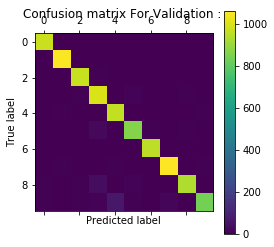

In [376]:
predicted_val = classifier1.predict(X_val)
print("Accuracy: %0.4f for Validation" % metrics.accuracy_score(Y_val, predicted_val))

cm = confusion_matrix(Y_val, predicted_val)

print(cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix For Validation : ')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Confusion Matrix For Testing : 

Accuracy: 0.9656 for Validation
[[ 974    0    1    0    0    1    3    1    0    0]
 [   0 1132    2    1    0    0    0    0    0    0]
 [   6    0 1012    6    2    0    1    3    2    0]
 [   0    0    7  986    1   11    0    3    2    0]
 [   1    0    3    0  965    0    2    0    3    8]
 [   2    0    0   22    1  860    2    0    2    3]
 [   9    2    1    0    3    4  936    0    3    0]
 [   1    8   16    2    7    0    0  986    1    7]
 [   3    0    6   37    2    3    3    5  913    2]
 [   7    3    6   14   56    5    0   20    6  892]]


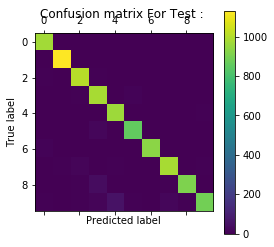

In [377]:
predicted_test = classifier1.predict(X_test)
print("Accuracy: %0.4f for Validation" % metrics.accuracy_score(y_test, predicted_test))

cm = confusion_matrix(y_test, predicted_test)

print(cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix For Test : ')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Confusion Matrix For Training : 

Accuracy: 0.9818 for Validation
[[4932    0    0    0    0    0    0    0    0    0]
 [   0 5678    0    0    0    0    0    0    0    0]
 [   6    2 4951    9    0    0    0    0    0    0]
 [   1    0   10 5074    0   14    0    1    1    0]
 [   0    0    0    0 4853    0    0    0    0    6]
 [   2    0    1   36    0 4466    0    0    1    0]
 [   0    0    0    0    0    0 4951    0    0    0]
 [   6    1    9    0   33    1    0 5103    0   22]
 [  24    1   51  153    5   25    3    1 4579    0]
 [  34    1   16   33  315   17    0   55   14 4503]]


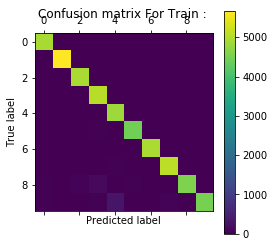

In [378]:
predicted_train = classifier1.predict(X_train)
print("Accuracy: %0.4f for Validation" % metrics.accuracy_score(y_train, predicted_train))

cm = confusion_matrix(y_train, predicted_train)

print(cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix For Train : ')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Confusion Matrix For USPS- Testing : 

Accuracy: 0.3474 for Validation
[[ 613    0 1052   41  148   56   16    7    7   60]
 [ 118  437  384  175  181   87   17  562   31    8]
 [  78    0 1782   78    9   28    5   13    6    0]
 [  29    1  524 1345    0   95    0    3    2    1]
 [  56    2  603   76  909  161    5  139   35   14]
 [ 107    0  866  166    5  835    2    1   17    1]
 [ 304    0 1037   36   43   68  506    0    4    2]
 [  73   43  987  309   17  153   10  389   15    4]
 [ 123    0 1010  385   22  373    3    3   79    2]
 [  31    1  997  436  152   67    0  211   52   53]]


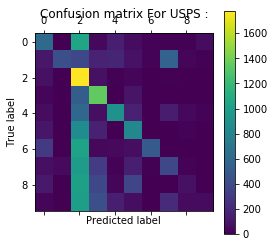

In [379]:
predicted_USPS = classifier1.predict(X_USPS_Test)
print("Accuracy: %0.4f for Validation" % metrics.accuracy_score(y_USPS_Test, predicted_USPS))

cm = confusion_matrix(y_USPS_Test, predicted_USPS)

print(cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix For USPS :')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [380]:
np.savetxt('SVM_MNIST_Val.csv',predicted_val, delimiter=",")
np.savetxt('SVM_MNIST_Test.csv',predicted_test, delimiter=",")
np.savetxt('SVM_MNIST_Train.csv',predicted_train, delimiter=",")
np.savetxt('SVM_USPS.csv',predicted_USPS, delimiter=",")

## Random Forest  MNIST Package : 

In [323]:
#RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators=20);
classifier2.fit(X_train, y_train)
print(classifier2.score(X_test, y_test)*100)

95.91


## Confusion Matrix For Validation : 

Accuracy: 0.9640 for Validation
[[ 978    0    3    4    2    0    1    0    3    0]
 [   0 1053    5    2    1    2    0    1    0    0]
 [   2    2  961    5    5    0    3    4    6    2]
 [   2    1    8  987    0   13    0    5   11    3]
 [   2    6    4    0  946    1    1    1    2   20]
 [   9    0    6   14    4  862    9    1    7    3]
 [   2    1    1    0    4    3  954    0    2    0]
 [   1    6   10    2    3    0    0 1054    1   13]
 [   5    5   10   14    3   11    5    3  944    9]
 [   5    3    2   12   17    4    0   13    4  901]]


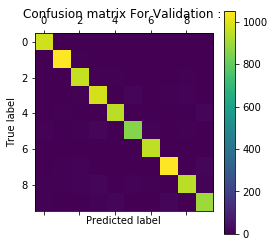

In [324]:
predicted_val = classifier2.predict(X_val)
print("Accuracy: %0.4f for Validation" % metrics.accuracy_score(Y_val, predicted_val))

cm = confusion_matrix(Y_val, predicted_val)

print(cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix For Validation : ')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Confusion Matrix For Testing : 

Accuracy: 0.9591 for Validation
[[ 972    0    1    0    2    1    1    2    1    0]
 [   0 1126    1    3    0    2    2    0    1    0]
 [   8    1  991    5    3    1    4    9    9    1]
 [   2    0   17  957    0   12    0    9   10    3]
 [   1    0    3    2  946    0    5    0    3   22]
 [   7    2    2   20    5  833   10    2   10    1]
 [   6    3    1    1    6    8  927    0    6    0]
 [   2    7   16    3    3    0    0  980    3   14]
 [   5    0    8   17    4    7    7    5  909   12]
 [   6    5    2   10   12    7    0    6   11  950]]


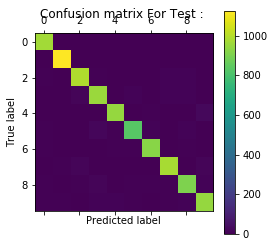

In [325]:
predicted_test = classifier2.predict(X_test)
print("Accuracy: %0.4f for Validation" % metrics.accuracy_score(y_test, predicted_test))

cm = confusion_matrix(y_test, predicted_test)

print(cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix For Test : ')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Confusion Matrix For Training : 

Accuracy: 0.9999 for Validation
[[4932    0    0    0    0    0    0    0    0    0]
 [   0 5677    1    0    0    0    0    0    0    0]
 [   0    0 4968    0    0    0    0    0    0    0]
 [   0    0    0 5101    0    0    0    0    0    0]
 [   0    0    0    0 4859    0    0    0    0    0]
 [   1    0    0    1    0 4504    0    0    0    0]
 [   0    0    0    0    0    0 4951    0    0    0]
 [   0    0    0    0    0    0    0 5175    0    0]
 [   0    0    0    0    0    0    0    0 4842    0]
 [   0    0    0    0    0    0    0    1    0 4987]]


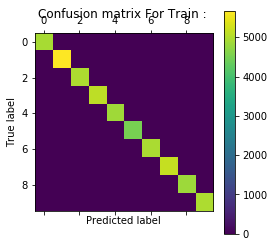

In [326]:
predicted_train = classifier2.predict(X_train)
print("Accuracy: %0.4f for Validation" % metrics.accuracy_score(y_train, predicted_train))

cm = confusion_matrix(y_train, predicted_train)

print(cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix For Train : ')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Confusion Matrix For USPS- Testing : 

Accuracy: 0.3367 for Validation
[[ 556   36  269   74  388  147  115  165    9  241]
 [  27  573  124  123   60   80   21  971   20    1]
 [ 113   82 1036  124   66  212   47  295   15    9]
 [  55   34  161 1051   70  390   10  191   11   27]
 [  13  193   93   62  938  214   21  408   26   32]
 [ 166   43  186  235   62 1109   40  131   10   18]
 [ 347   84  296   57  137  289  610  141   12   27]
 [  39  328  381  300   53  226   41  613    8   11]
 [ 114   63  221  253  153  794   98  129  134   41]
 [  22  251  276  362  225  155   23  502   71  113]]


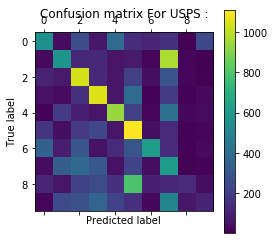

In [327]:
predicted_USPS = classifier2.predict(X_USPS_Test)
print("Accuracy: %0.4f for Validation" % metrics.accuracy_score(y_USPS_Test, predicted_USPS))

cm = confusion_matrix(y_USPS_Test, predicted_USPS)

print(cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix For USPS :')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [353]:
np.savetxt('RF_MNIST_Val.csv',predicted_val, delimiter=",")
np.savetxt('RF_MNIST_Test.csv',predicted_test, delimiter=",")
np.savetxt('RF_MNIST_Train.csv',predicted_train, delimiter=",")
np.savetxt('RF_USPS.csv',predicted_USPS, delimiter=",")

## Logistic Regression : 

In [381]:
def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm

def Loss_Function(w,x,y,la):
    a = X_train.shape[0] #Get Training Smaples
    y_mat = onehot(y) #Convert to One Hot Vector 
    value = np.dot(x,w) #Compute value for raw data
    P = softmax(value) #perform softmax
    Loss = (-1 / a) * np.sum(y_mat * np.log(P)) + (la/2)*np.sum(w*w) #Compute Loss over Probabilities
    Descent = (-1 / a) * np.dot(x.T,(y_mat - P)) + la*w #Compute Descent Over Loss
    return Loss,Descent

def Predictions(X):
    P1 = softmax(np.dot(X,w))
    P2 = np.argmax(P1,axis=1)
    return P2

def onehot(Y):
    a = Y.shape[0]
    oneY = scipy.sparse.csr_matrix((np.ones(a), (Y, np.array(range(a)))))
    oneY = np.array(oneY.todense()).T
    return oneY

def getAccuracy(X,Y):
    p2 = Predictions(X)
    Accuracy = sum(p2 == Y)/(float(len(X)))
    return Accuracy

Training Losses:  22.516582665713628


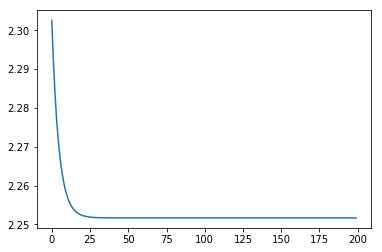

In [382]:
w = np.zeros([X_train.shape[1], 10])
la = 10
iter_max = 200
LR = 1e-2
Loss_max = []
for i in range(0,iter_max):
    Loss,Descent = Loss_Function(w,X_train,y_train,la)
    Loss_max.append(Loss)
    w = w - (LR * Descent)
print ('Training Losses: ', Loss*10)    
plt.plot(Loss_max)

In [383]:
print ('Training Accuracy: ', getAccuracy(X_USPS_Test,y_USPS_Test)*100)


Training Accuracy:  24.251212560628034


In [384]:
Y_train_pred = Predictions(X_train)
Y_test_pred = Predictions(X_test)
Y_val_pred = Predictions(X_Val)
Y_USPS_pred = Predictions(X_USPS_Test)

NameError: name 'X_Val' is not defined

In [ ]:
np.savetxt('LR_MNIST_Val.csv',Y_val_pred, delimiter=",")
np.savetxt('LR_MNIST_Test.csv',Y_test_pred, delimiter=",")
np.savetxt('LR_MNIST_Train.csv',Y_train_pred, delimiter=",")
np.savetxt('LR_USPS.csv',Y_USPS_pred, delimiter=",")

In [ ]:
print ('UBITname      = nabhyank')
print ('Person Number = 50290958')